In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from root_pandas import read_root
from matplotlib import rc
from numpy import inf

rc('text', usetex=True)

def applyCut(inputDataframe, cut, text=None):
    dataframe = inputDataframe
    nbeforecut = dataframe.shape[0]
    cutDataframe = dataframe.query(cut)
    if text:
        print text, cutDataframe.shape[0], ' fraction kept: %2.1f'%(100.0*float(cutDataframe.shape[0])/nbeforecut)
    return cutDataframe

def getData(inputFiles):
    
    cols = []
    scalar = []
    scalar.append('evid')
    scalar.append('xsec')
    scalar.append('ntrials')    
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('W2')
    scalar.append('e_eta')
    scalar.append('e_theta')
    scalar.append('e_p')
    scalar.append('e_pt')


    
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists+cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

Welcome to JupyROOT 6.15/01


In [2]:
def applyCuts(df):
    temp = df
    temp = applyCut(temp, '0.1 < y < 0.85', '0.1 < y < 0.85')
    temp = applyCut(temp, 'Q2>25', 'Q2>25')
    #temp = applyCut(temp, 'x > 0.05', 'x>0.05')
    #temp = applyCut(temp, 'dphi_e_jet > 2.74', 'dphi_e_jet>3.14159-0.4')
    #temp = applyCut(temp, 'Q2>100.0', ' Q2>100.0')
    #temp.eval('dphi = 3.14159-dphi_e_jet', inplace=True)
    temp.eval('logQ2= log(Q2)/2.3025850', inplace=True)
    temp.eval('logx= log(x)/2.3025850', inplace=True)
    return temp

In [4]:
df = getData(['NC_20_250.root'])
xsec = np.mean(df['xsec'])
xsec = xsec*1e9
print 'xsection %2.2f [pb]' %(xsec)
accepted = df.shape[0]
print 'accepted events' , accepted
to_cross_section = xsec/(1.0*accepted)

df = applyCuts(df)
print 'Accepted cross-section: %2.0f [pb]'%(df.shape[0]*to_cross_section)

##Total cross-section: 
## in units of fb:
lumi = 100 # in units of fb-1. 
integrated_rate    = 1000*lumi*xsec #multiply by 1000 and then 100 to get integrated yield for 100 fb-1
print 'Integrated rate %2.3f [M]' %(integrated_rate/1e6)


Processed NC_20_250.root in 0.0 seconds
xsection 22220.50 [pb]
accepted events 30000
0.1 < y < 0.85 14931  fraction kept: 49.8
Q2>25 14839  fraction kept: 99.4
Accepted cross-section: 10991 [pb]
Integrated rate 2222.050 [M]



Processed NC_20_250.root in 0.0 seconds
xsection 22220.50 [pb]
accepted events 30000
0.1 < y < 0.85 14931  fraction kept: 49.8
Q2>25 14839  fraction kept: 99.4
Accepted cross-section: 10991 [pb]
[159.11357983  29.10885247  11.27319935   5.92546615   3.48121136
   2.23686347   1.68875785   1.39248455   0.79993793   0.65180128]
[174.548611821, 29.7689334957, 11.4497244841, 5.8508104121, 3.48242036824, 2.2766642155, 1.58607089636, 1.15761868311, 0.876006984652, 0.680301593143]
[1.09700638 1.0226763  1.01565883 0.98740087 1.00034729 1.0177931
 0.93919379 0.83133324 1.0950937  1.04372547]


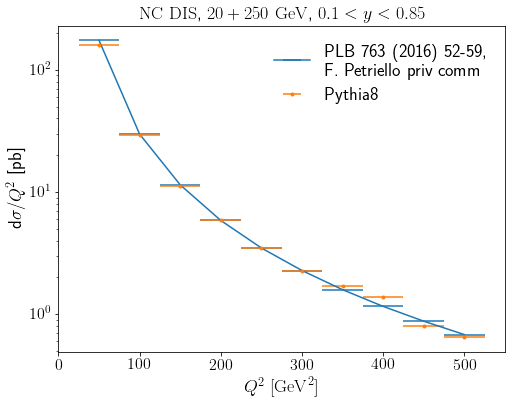

In [5]:
df = getData(['NC_20_250.root'])
xsec = np.mean(df['xsec'])
xsec = xsec*1e9
print 'xsection %2.2f [pb]' %(xsec)
accepted = df.shape[0]
print 'accepted events' , accepted
to_cross_section = xsec/(1.0*accepted)

df = applyCuts(df)
print 'Accepted cross-section: %2.0f [pb]'%(df.shape[0]*to_cross_section)


fig, ax1 = plt.subplots(figsize=(8,6))


Frank_x = [50.0, 100.0 ,150.0, 200.0 ,250.0,300.0,350.0,400.0 ,450.0,500.0]
Frank_y = [174.548611821, 29.7689334957, 11.4497244841, 5.8508104121,3.48242036824,2.2766642155,1.58607089636,1.15761868311,0.876006984652,0.680301593143]

errx = 25*np.ones(len(Frank_x))
plt.errorbar(Frank_x,Frank_y,xerr=errx, label='PLB 763 (2016) 52-59, \nF. Petriello priv comm')
plt.yscale('log')



y, x  = np.histogram(df['Q2'],bins=np.linspace(25,525,11))
xerr = (x[1:] - x[:-1])/2.0
x = (x[1:]+x[:-1])/2
y = y*to_cross_section
y = y/(xerr*2.0)

plt.errorbar(x,y,  xerr = xerr, fmt='.',ls='none',label='Pythia8')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel('$Q^{2}$\ $[\mathrm{GeV}^{2}]$',fontsize=18)
plt.ylabel(r'd$\sigma$/$Q^{2}$ [pb]',fontsize=18)
plt.title('$\mathrm{NC}\ \mathrm{DIS}$, $20+250$ $\mathrm{GeV}$, $0.1<y<0.85$', fontsize=18)

plt.legend(loc='best',frameon=False,fontsize=18)
print y 
print Frank_y
print np.divide(Frank_y,y)
plt.show()
